# Blood Glucose Management

Blood glucose dynamics are highly individual and varying from day to day. Factors such as meals, exercise, stress and sleep (MESS) have an impact. For women, hormones released during different phases in the menstrual cycle will also have an impact. In this section we will explain the dynamics of the most significant factors affecting blood glucose levels.  

## MESS
### Meals
Food intake will increase BGC. The effect usually lasts for 2-4 hours. Patients with T1D must inject insulin with respect to meals to countereffect the increase and avoid hyperglycemia. Intra- and interindividual variabilities in meal-glucose effects complicates the estimations of bolus doses necessary to keep BGC inside of target range. However, there is a correlation between the amount of carbohydrates consumed, and the total increase in BGC. Standard insulin pump therapy uses carbohydrate counting estimates to predict necessary insulin doses. 

There has been made various attempts on creating linear meal absorption models. They differ in which factors that are included in the models, for example number of carbohydrates, number of other macronutrients, stomach and gastric emptying and absorption rate {cite}`meal_models`. In addition, attempts have been made to personalize meal absorption models using historical data {cite}`clinical_trial_simulation`, expressed as differential equation. The open-source AP system named Loop is using a dynamic carbohydrate absorption model where carbohydrate effects are not modelled with differential equations, but using the expected changes in BGC compared to observed changes in BGC {cite}`carb_eff`. 

### Exercise and Stress
High intensity exercise or even just physical activity like walking the dog or cleaning the house has an impact on BGC. This can lead to either decrease or increase of BGC, depending on several factors such as intensity, duration and the type of activity. Acute psychological stress due to a sudden event, for example because of playing on a concert or a house fire, might increase BGC. There is a lack of research on how to detect these situations and take account for them in an AP system. Especially in combination with exercise is very challenging. An example is when a patient is competing in a sport competition. The adrenaline might increase BGC, while the patient reduces insulin regarding the exercise leading to hyperglycemia. 

### Sleep
The effect of sleep on BGC is called the dawn phenomenon. Insulin demand typically increases in the morning, and breakfast tent to require more insulin per carbohydrate than other meals. This can be considered by increase the basal rate in the early morning, but also keeping in the back of the mind that sleep patterns might vary. Perriello et al. {cite}`dawn_phenomenon` states that the magnitude of the dawn phenomenon is approximately ~20% in T1D patients, it is reproducible and influenced by some known factors. Hence, there is potential for this to be taken account for in an AP system. 

## Menstrual Cycle
Up to two thirds of women experience menstrual phenomenon {cite}`shahid_large-scale_2022`. This consists in changing insulin sensitivities throughout the month. The release of hormones increases the insulin resistance. However, the effect is not very well studied and further analysis should be done to better understand it.

## Insulin 
Insulin has a decreasing effect on BGC. Duration and absorption pattern depends on the type of insulin injected. Traditional treatment of diabetes consists in injecting discrete amounts of insulin with an insulin pen or continuously with an insulin pump. AP systems require insulin pump therapy, so in this report we will highlight the specifications of insulin types suitable for insulin pumps. 

In a person without diabetes, the pancreas will release insulin due to changes in BGC, and the insulin will immediately be absorbed. When insulin is injected through the subcutaneous tissue, however, there is a delay in insulin absorption. For rapid acting insulin, this delay is approximately 15 minutes. The peak effect is after 30 to 180 minutes, and the effect lasts in the body for at least 180 minutes {cite}`insulin_types`. These dynamics are slow compared to a non-diabetic human, which complicates AP systems. The effect of insulin or withholding insulin will often come too late leading to hypo- or hyperglycemia. Extensive research is being made to discover ways for insulin to be absorbed more quickly, leading to an ultra-rapid insulin type named Fiasp. This insulin type has a start effect after 0-2 minutes. Unfortunately patients have experienced problems like inflammation and insulin resistance using this type of insulin in insulin pumps {cite}`fiasp_flaws`. More experimental patients are going off-label leading to interesting results. Patients are mixing insulin types and experiencing the benefits of both insulin types, through tips on social media {cite}`fiasp_non_compliant`. This is not recommended by the insulin manufacturer.

Insulin on board (IOB) is a common way to calculate how much active insulin the patient has in the body at a given time. An estimate of how much insulin that is absorbed after a given amount of time is expressed by mathematical equations. These curves differ in shape and in delay, peak activity time and the total time of effect. For each insulin injection, the remaining amount at a given time is calculated. IOB is a useful tool in AP systems to predict future BGC. Further description and implementation can be found in the [chapter about model predictive control](mpc:iob).

## Glucose Sensors
CGM sensors have been essential in the evolution of hybrid-loop AP systems. However, there is room for improvement that might prove beneficial. More frequent and accurate readings (Continuous Glucose Monitor) would improve glucose predictions. Time lag between the interstitial fluid and BGC slows down the dynamics of an AP system. This is especially problematic when BGC is rapidly changing, which might also be in combination with disturbances on accuracy such as exercise. 

### Error Grid Analysis

Risks of glucose measurement errors can be analyzed using an error grid {cite}`error_grid`. These plots ({numref}`error_grid`) explain the risk of how different errors from true BGC can lead to different types of faulty actions. In AP systems it is common to predict future glucose levels and make action based on the predictions. Therefore, the error grid risk-analysis might be applied to glucose predictions as well as BGC measurements. 


``` {figure} img/error_grid.png
---
name: error_grid
---
Error Grid Analysis. Figure borrowed from {cite}`error_grid`.

```




In [78]:
# Implementation of error grid analysis
# Using two lists of random numbers inside reasonable values for BGC measurements

import random

reference_BG = []
measured_BG = []

BG_lower_lim = 0
BG_upper_lim = 400

for i in range(0,100):
    n1 = random.randint(BG_lower_lim*10,BG_upper_lim*10)/10
    reference_BG.append(n1)
    n2 = n1 + random.randint(0,150) - 75
    if n2 < 0:
        measured_BG.append(0)
    elif n2 > 400:
        measured_BG.append(400)
    else: 
        measured_BG.append(n2)

(<module 'matplotlib.pyplot' from '/opt/homebrew/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
 [60, 31, 0, 9, 0])

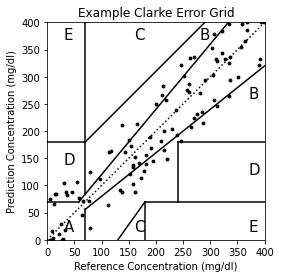

In [79]:
# ClarkeErrorGrid from https://github.com/suetAndTie/ClarkeErrorGrid
from ClarkeErrorGrid import *

clarke_error_grid(reference_BG, measured_BG, "Example")

% The plot above could have been implemented to be probobalistic like in the figure above
% Link to discussion about implementation: 
% https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib